In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("spam.csv")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3117,ham,R u saying i should re order the slippers cos ...,NaN,NaN,NaN
5211,ham,It is only yesterday true true.,NaN,NaN,NaN
5293,ham,I donno its in your genes or something,NaN,NaN,NaN
4694,spam,URGENT! Your Mobile No 07808726822 was awarded...,NaN,NaN,NaN
4231,ham,I'm at home. Please call,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# 1. Data Clenaing:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
#dropping columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)


,v1,v2
960,ham,U sure u can't take any sick time?
697,ham,meet you in corporation st outside gap ‰Û_ you...
3653,ham,Why i come in between you people
3022,ham,You are a very very very very bad girl. Or lady.
3865,ham,"Theoretically yeah, he could be able to come"


In [14]:
#renamimg the columns
df.rename(columns={'v1':'target','v2':'text'},inplace='True')
df.sample(5)

,target,text
1206,spam,"As a SIM subscriber, you are selected to recei..."
1627,spam,You have been selected to stay in 1 of 250 top...
711,ham,It just seems like weird timing that the night...
3505,ham,Nite...
4480,ham,No..its ful of song lyrics..


In [15]:
#target variable converting to numeric variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df["target"]=encoder.fit_transform(df["target"])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#check for duplicate values:
df.duplicated().sum()

403

In [20]:
#remove duplicated:
df=df.drop_duplicates(keep="first")

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# 2.EDA:Exploritary data analysis

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

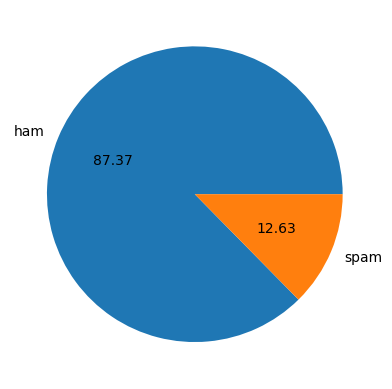

In [25]:
plt.pie(df['target'].value_counts(),labels=["ham",'spam'],autopct='%0.2f')
plt.show()

In [19]:
#data is imbalenced


In [26]:
import nltk

In [27]:
!pip install nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vishvajeet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['No_Of_Charecters']=df["text"].apply(len)

In [32]:
df.head()

,target,text,No_Of_Charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#calculating words in text msg
#list formed using nltk 

df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [34]:
df['No_Of_Words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df['No_Of_Words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: No_Of_Words, Length: 5169, dtype: int64

In [36]:
df.head()

,target,text,No_Of_Charecters,No_Of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
#no of setence in each text
df["No_Of_Sentence"]=df['text'].apply(lambda x:nltk.sent_tokenize(x))
df["No_Of_Sentence"].head()

0    [Go until jurong point, crazy.., Available onl...
1                     [Ok lar..., Joking wif u oni...]
2    [Free entry in 2 a wkly comp to win FA Cup fin...
3    [U dun say so early hor... U c already then sa...
4    [Nah I don't think he goes to usf, he lives ar...
Name: No_Of_Sentence, dtype: object

In [38]:
df["No_Of_Sentence"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df["No_Of_Sentence"]

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: No_Of_Sentence, Length: 5169, dtype: int64

In [39]:
df.head()

,target,text,No_Of_Charecters,No_Of_Words,No_Of_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

,No_Of_Charecters,No_Of_Words,No_Of_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [41]:
# for ham:
df[df['target']==0][['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

,No_Of_Charecters,No_Of_Words,No_Of_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [42]:
df[df['target']==1][['No_Of_Charecters','No_Of_Words','No_Of_Sentence']].describe()

,No_Of_Charecters,No_Of_Words,No_Of_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [43]:
#visualizinng the and comparing the varibles
import seaborn as sns

<Axes: xlabel='No_Of_Charecters', ylabel='Count'>

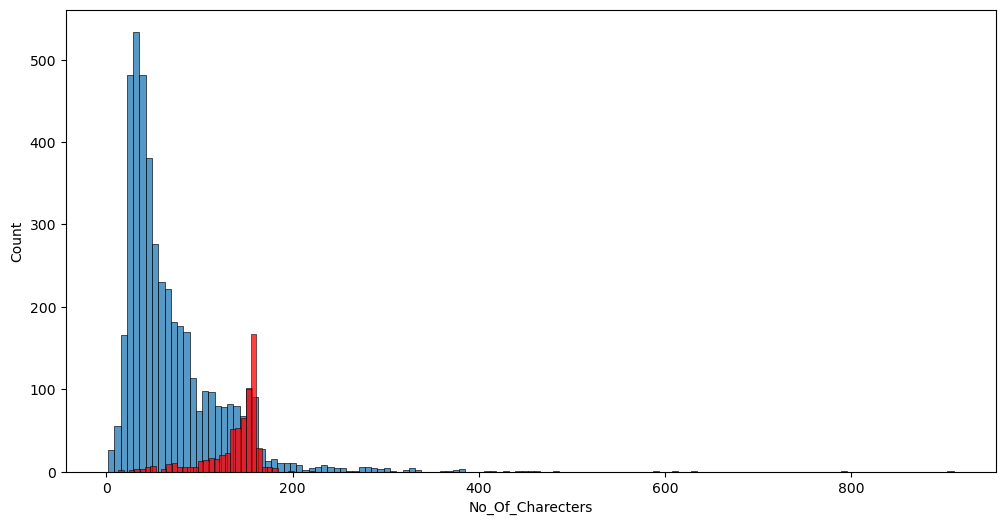

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_Of_Charecters'])
sns.histplot(df[df['target']==1]['No_Of_Charecters'],color='red')

<Axes: xlabel='No_Of_Words', ylabel='Count'>

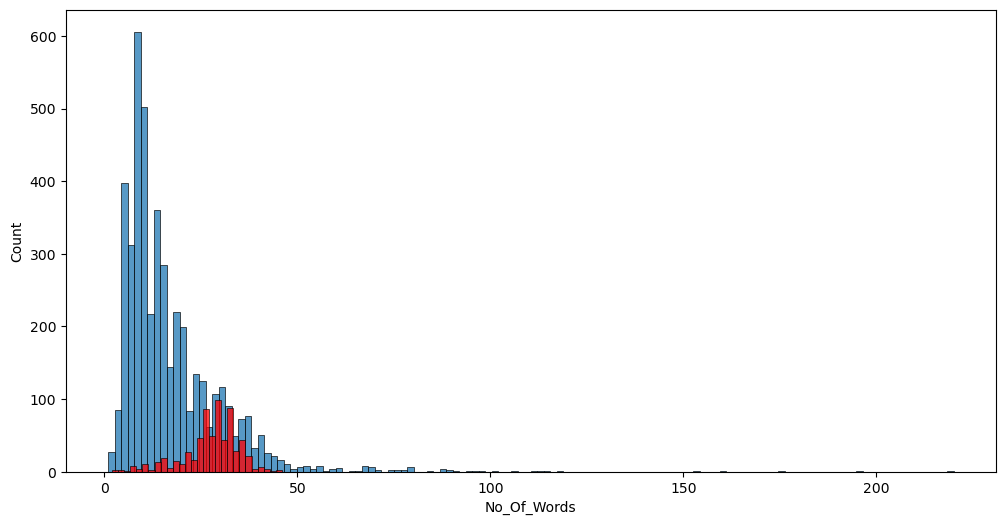

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_Of_Words'])
sns.histplot(df[df['target']==1]['No_Of_Words'],color='red')


<Axes: xlabel='No_Of_Sentence', ylabel='Count'>

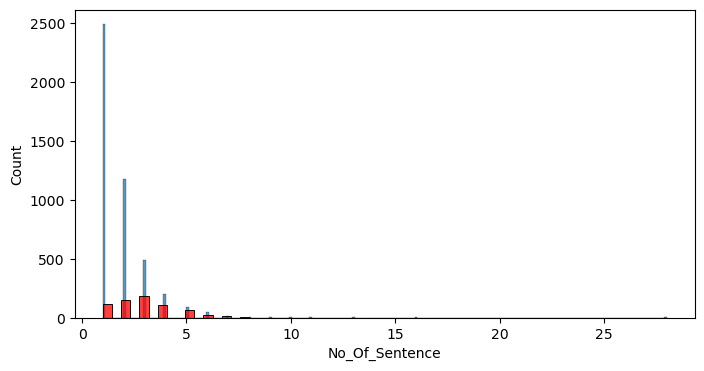

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target']==0]['No_Of_Sentence'])
sns.histplot(df[df['target']==1]['No_Of_Sentence'],color='red')

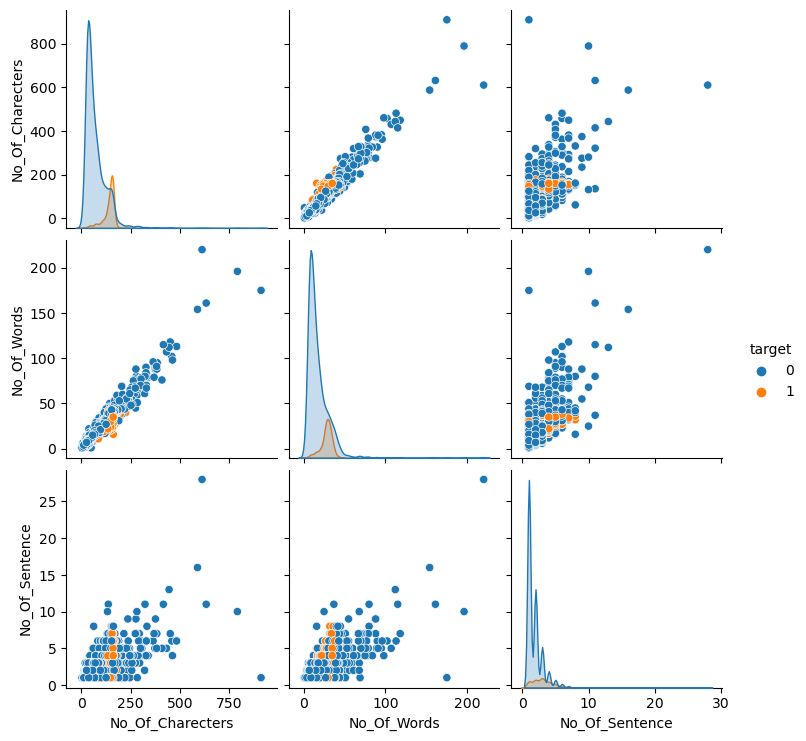

In [47]:
sns.pairplot(df,hue='target')

C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_28604\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

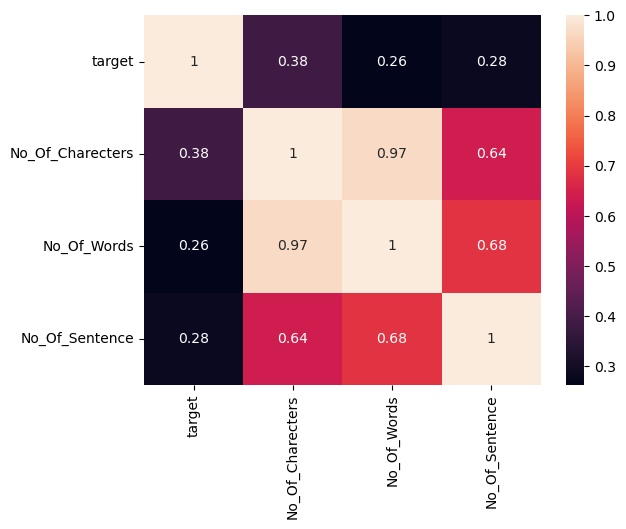

In [40]:
sns.heatmap(df.corr(),annot=True)

# 3.data preprocessing:

1.lower case
2.tokenisation
3.removing the special charaetcters
4.removing stop words and puncations
5.stemming

In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishvajeet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [50]:
def transform_text(text):
    # 1.lower case
    text=text.lower()
    text=nltk.word_tokenize(text)
    
   #removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #stopords and punctuations
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
     
    #steamming
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [51]:
transform_text('I Loved the Online Lectures On ML ,How About You')

'love onlin lectur ml'

In [52]:
text=df['text'][0]
transform_text(text)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [53]:
text=df['text'][1]
transform_text(text)

'ok lar joke wif u oni'

In [54]:
#appling to the all the vlaues in text columns
df['transformed_text']=df['text'].apply(transform_text)


In [55]:
df.head()

,target,text,No_Of_Charecters,No_Of_Words,No_Of_Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# creating wordcloud

it will highlight the main words in text message

In [56]:
!pip install wordcloud

In [57]:
from wordcloud import WordCloud
wc= WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

In [59]:
# word cloud for spam messeges
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

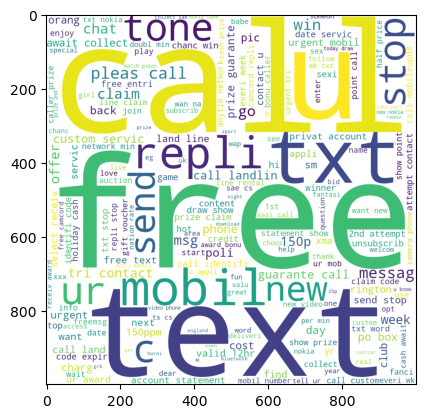

In [62]:
plt.imshow(spam_wc)

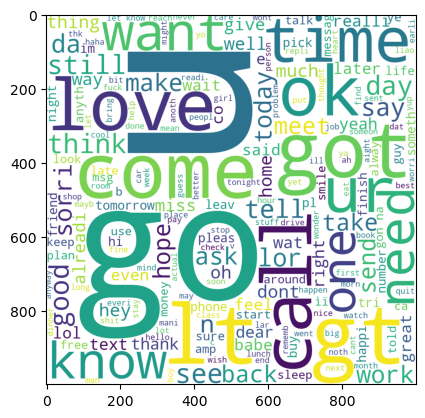

In [63]:
#creating wordcloud for the ham messages
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

plt.imshow(ham_wc)

#creating list words that are lies in spams:

In [65]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [66]:
#taking most 30 comman words in spam messages and creating datframe of them sequentially
from collections import Counter
mcs=pd.DataFrame(Counter(spam_corpus).most_common(30))
mcs #(most common spam word)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


#plotting the graph 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

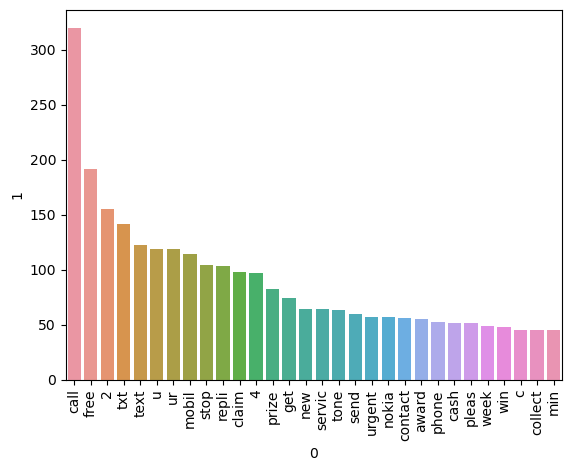

In [67]:
sns.barplot(x=mcs[0],y=mcs[1],data=mcs)
plt.xticks(rotation='vertical')

In [68]:
#similary for the ham messages:

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
            for word in msg.split():
                ham_corpus.append(word)

In [69]:
len(ham_corpus)

35394

In [70]:
#creating data frame : #mah(most common ham):
mch=pd.DataFrame(Counter(ham_corpus).most_common(30))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

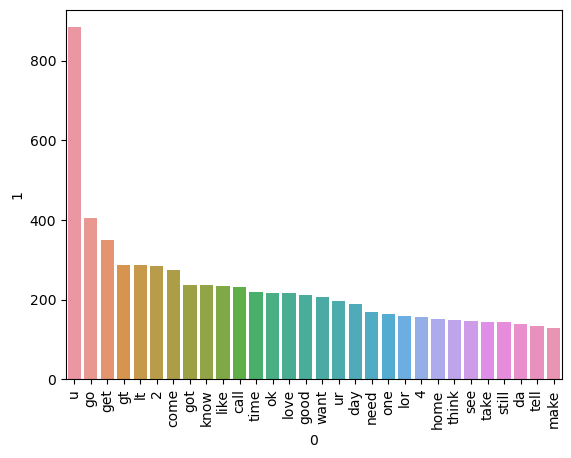

In [72]:
sns.barplot(x=mch[0],y=mch[1],data=mch)
plt.xticks(rotation='vertical')

# 4.Model Building:

In [73]:
#using CountVectorizer()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [75]:
X= cv.fit_transform(df["transformed_text"]).toarray()

In [76]:
X.shape

(5169, 6708)

In [77]:
Y=df["target"].values

In [78]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [82]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [83]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [84]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [85]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# using tfidf

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [87]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
X.shape

(5169, 3000)

In [89]:
Y=df["target"].values

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [91]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [92]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [93]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [94]:
# --------> mnb giving high precion(1) using tfidf 

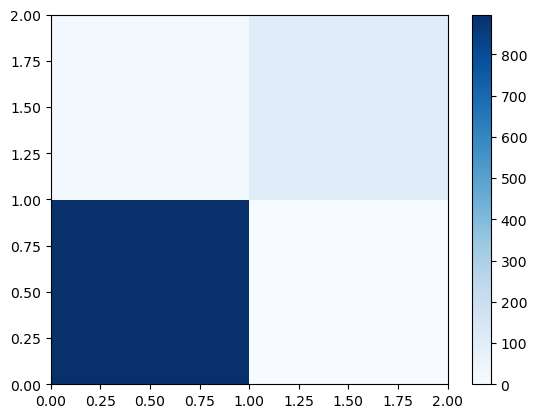

In [95]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix
plt.pcolor(cm, cmap='Blues')
plt.colorbar()
plt.show()

In [96]:
# importing different classifieing models

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier



In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb=MultinomialNB() 

dtc= DecisionTreeClassifier(max_depth=5)

lrc= LogisticRegression(solver='liblinear', penalty='l1')

rfc=RandomForestClassifier(n_estimators=50, random_state=2)

adb=AdaBoostClassifier(n_estimators=50, random_state=2)
                         


In [98]:
clfs={
    'SVC':svc,
    "knc":knc,
    "MNB":mnb,
    "DTC":dtc,
    "LRC":lrc,
    "RFC":rfc,
    "ADB":adb,
    
}

In [99]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [100]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [101]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items(): 
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print(f"for {name} \n Accuracy:{current_accuracy}\n Precision:{current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC 
 Accuracy:0.9758220502901354
 Precision:0.9747899159663865
for knc 
 Accuracy:0.9052224371373307
 Precision:1.0
for MNB 
 Accuracy:0.9709864603481625
 Precision:1.0
for DTC 
 Accuracy:0.9323017408123792
 Precision:0.8333333333333334
for LRC 
 Accuracy:0.9584139264990329
 Precision:0.9702970297029703
for RFC 
 Accuracy:0.9748549323017408
 Precision:0.9827586206896551
for ADB 
 Accuracy:0.960348162475822
 Precision:0.9292035398230089


In [102]:
performance_df=pd.DataFrame({'algorithm':clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [103]:
performance_df

,algorithm,Accuracy,Precision
1,knc,0.905222,1.000000
2,MNB,0.970986,1.000000
5,RFC,0.974855,0.982759
0,SVC,0.975822,0.974790
4,LRC,0.958414,0.970297
6,ADB,0.960348,0.929204
3,DTC,0.932302,0.833333


In [104]:
## ------------> model improvement

In [105]:
temp_df=pd.DataFrame({"algorithm":clfs.keys(),"Accuracy_maxft_3000":accuracy_scores,"Precision_maxft_3000":precision_scores}).sort_values('Precision_maxft_3000',ascending=False)

In [106]:
performance_df.merge(temp_df,on="algorithm")

,algorithm,Accuracy,Precision,Accuracy_maxft_3000,Precision_maxft_3000
0,knc,0.905222,1.000000,0.905222,1.000000
1,MNB,0.970986,1.000000,0.970986,1.000000
2,RFC,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,LRC,0.958414,0.970297,0.958414,0.970297
5,ADB,0.960348,0.929204,0.960348,0.929204
6,DTC,0.932302,0.833333,0.932302,0.833333


In [113]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl","wb"))

In [114]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!streamlit run app.py